In [4]:
import pandas as pd
import numpy as np
import requests
import os
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
proxyHost = '********'
proxyPort = '********'
account='********'
password='********'
proxy_url = "http://{}:{}@{}:{}/".format(account, password, proxyHost, proxyPort)
proxies = {'https': proxy_url, 'http': proxy_url}
response = requests.get(url, proxies=proxies)

with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)
# import WeRateDogs data and transfer twitter_archive array
twitter_archive = pd.read_csv(r'C:\Users\u0037545\Desktop\test\twitter-archive-enhanced.csv')
# import downloaded data and transfer to image_predictions array
image_predictions = pd.read_csv(r'C:\Users\u0037545\Desktop\test\image-predictions.tsv',sep='\t')
# import twitter data and get the request data
tweet_list = []
file = open(r'C:\Users\u0037545\Desktop\test\tweet-json.txt')
for line in file.readlines():
    tweet_line = json.loads(line)
    tweet_id = tweet_line['id']
    retweet_count = tweet_line['retweet_count']
    favorite_count = tweet_line['favorite_count']
    tweet_list.append({'tweet_id':tweet_id,
                    'retweet_count':retweet_count,
                    'favorite_count':favorite_count})

In [6]:
# transfer to tweet data array
tweet = pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count'])
tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [9]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


In [13]:
# check information
twitter_archive[twitter_archive.text.str.find('RT @') >= 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [14]:
# 判断text中转发信息的个数与retweeted_status_id转发编号的数量是否相同
len(twitter_archive[twitter_archive.text.str.find('RT @') >= 0]) == len(twitter_archive[twitter_archive.retweeted_status_id.notnull()])


True

In [16]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [15]:
# 查看rating_denominator 列中数据的准确性
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [17]:
twitter_archive[twitter_archive.rating_denominator != 10].text

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someon

In [18]:
#  check the name column
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [19]:
# check jpg_url column if it have duplicated values
image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [20]:
df1 = twitter_archive.copy()
df2 = image_predictions.copy()
df3 = tweet.copy()

In [21]:
df = df1.merge(df3,how='left').merge(df2,how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

In [22]:
df = df[df.text.str.find('RT @') == -1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

In [23]:
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  retweet_count       1994 non-null   float64
 13  favorite_count      1994 non-null   float64
 14  jpg_url             1994 non-null   object 
 15  img_num             1994 non-null   int64  
 16  p1    

In [24]:
df = df.drop(['expanded_urls','source'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   text                1994 non-null   object 
 3   rating_numerator    1994 non-null   int64  
 4   rating_denominator  1994 non-null   int64  
 5   name                1994 non-null   object 
 6   doggo               1994 non-null   object 
 7   floofer             1994 non-null   object 
 8   pupper              1994 non-null   object 
 9   puppo               1994 non-null   object 
 10  retweet_count       1994 non-null   float64
 11  favorite_count      1994 non-null   float64
 12  jpg_url             1994 non-null   object 
 13  img_num             1994 non-null   int64  
 14  p1                  1994 non-null   object 
 15  p1_conf             1994 non-null   float64
 16  p1_dog

In [25]:
df_stage = df[(df.puppo != 'None')|(df.floofer != 'None')|(df.doggo != 'None')|(df.pupper != 'None')]
df_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 9 to 1741
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            306 non-null    int64  
 1   timestamp           306 non-null    object 
 2   text                306 non-null    object 
 3   rating_numerator    306 non-null    int64  
 4   rating_denominator  306 non-null    int64  
 5   name                306 non-null    object 
 6   doggo               306 non-null    object 
 7   floofer             306 non-null    object 
 8   pupper              306 non-null    object 
 9   puppo               306 non-null    object 
 10  retweet_count       306 non-null    float64
 11  favorite_count      306 non-null    float64
 12  jpg_url             306 non-null    object 
 13  img_num             306 non-null    int64  
 14  p1                  306 non-null    object 
 15  p1_conf             306 non-null    float64
 16  p1_dog 

In [26]:
df_stage = pd.melt(df_stage,id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name',
                                     'jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog',
                                     'retweet_count','favorite_count'],
                   value_vars=['doggo','floofer','pupper','puppo'],
                   var_name='stage_name',value_name='stage')
df_stage = df_stage[df_stage.stage != 'None'].drop(['stage_name'],axis=1)
df_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 1062
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            317 non-null    int64  
 1   timestamp           317 non-null    object 
 2   text                317 non-null    object 
 3   rating_numerator    317 non-null    int64  
 4   rating_denominator  317 non-null    int64  
 5   name                317 non-null    object 
 6   jpg_url             317 non-null    object 
 7   img_num             317 non-null    int64  
 8   p1                  317 non-null    object 
 9   p1_conf             317 non-null    float64
 10  p1_dog              317 non-null    bool   
 11  p2                  317 non-null    object 
 12  p2_conf             317 non-null    float64
 13  p2_dog              317 non-null    bool   
 14  p3                  317 non-null    object 
 15  p3_conf             317 non-null    float64
 16  p3_dog 

In [27]:
df = df.merge(df_stage,how='outer')
df = df.drop(['doggo','floofer','pupper','puppo'],axis=1)
df.drop_duplicates('tweet_id',keep='first',inplace=True)
df.stage.count()

306

In [28]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [29]:
df['stage'] = df.text.str.findall(r'doggo|puppo|pupper|floof')
df['stage'] = df.apply(lambda row: list(set(row['stage'])),axis=1)
df['stage'] = df.apply(lambda row: ','.join(row['stage']),axis=1)
df.stage = df.stage.replace('',np.nan)
df.stage.value_counts()
df['name'] = df.text.str.extract(r'(?:This is|Meet|Say hello to|Here is|named|name is|name to|Here we have)\s([A-Z][^\s.,]*)',expand=True)
df[df.name.notnull()].name.count()

1382

In [30]:
# 提取尾数为0的分数
df['rating'] = df.text.str.extract(r'\D*([\d.]+\/\d+0)',expand=True)
# 查看提取分数为空的情况
df[df.rating.isnull()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,rating
388,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,1655.0,5927.0,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN,NaN


In [31]:
ind = df[df.rating.isnull()].index
df.loc[ind,'rating'] = df.loc[ind,'text'].str.extract(r'\D*([\d.]+\/\d+)',expand=False)
df.loc[ind,'rating']

388    24/7
Name: rating, dtype: object

In [32]:
df['rating_numerator'],df['rating_denominator'] = df.rating.str.split('/').str
df[['rating_numerator','rating_denominator']] = df[['rating_numerator','rating_denominator']].astype(float).astype(int)
df.rating_numerator.value_counts()

12      450
10      420
11      398
13      262
9       152
8        95
7        51
14       36
5        32
6        32
3        19
4        16
2         9
1         4
0         2
88        1
60        1
144       1
121       1
143       1
44        1
165       1
45        1
80        1
99        1
50        1
204       1
1776      1
24        1
84        1
420       1
Name: rating_numerator, dtype: int64

In [33]:
df['rating_numerator'] = df['rating_numerator'] / df['rating_denominator'] * 10
df['rating_denominator'] = 10
# delete rating column
df.drop(['rating'],axis=1,inplace=True)

In [34]:
# 测试
df.rating_numerator.value_counts()

12.000000      454
10.000000      422
11.000000      404
13.000000      262
9.000000       153
8.000000        95
7.000000        51
14.000000       36
5.000000        32
6.000000        32
3.000000        19
4.000000        15
2.000000        10
1.000000         4
0.000000         2
34.285714        1
1776.000000      1
420.000000       1
Name: rating_numerator, dtype: int64

In [35]:
df.rating_denominator.value_counts()

10    1994
Name: rating_denominator, dtype: int64

In [36]:
df.timestamp = pd.to_datetime(df.timestamp.str.split('+',expand=True)[0])
df.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [37]:
df[df.jpg_url.duplicated()]

# output df information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2004
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   int64         
 1   timestamp           1994 non-null   datetime64[ns]
 2   text                1994 non-null   object        
 3   rating_numerator    1994 non-null   float64       
 4   rating_denominator  1994 non-null   int64         
 5   name                1382 non-null   object        
 6   retweet_count       1994 non-null   float64       
 7   favorite_count      1994 non-null   float64       
 8   jpg_url             1994 non-null   object        
 9   img_num             1994 non-null   int64         
 10  p1                  1994 non-null   object        
 11  p1_conf             1994 non-null   float64       
 12  p1_dog              1994 non-null   bool          
 13  p2                  1994 non-null   object      

In [38]:
df.to_csv(r'C:\Users\u0037545\Desktop\test\twitter_archive_master.csv', encoding='utf_8', index=False)

In [39]:
db = pd.read_csv(r'C:\Users\u0037545\Desktop\test\twitter_archive_master.csv')
db.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [40]:
is_dog = []
for index, row in db.iterrows():
    if row['p1_dog'] == True:
        is_dog.append({'tweet_id':row['tweet_id'],
                       'variety':row['p1'],
                       'rating':row['rating_numerator']})
    elif row['p2_dog'] == True:
        is_dog.append({'tweet_id':row['tweet_id'],
                       'variety':row['p2'],
                       'rating':row['rating_numerator']})
    elif row['p3_dog'] == True:
        is_dog.append({'tweet_id':row['tweet_id'],
                       'variety':row['p3'],
                       'rating':row['rating_numerator']})


In [41]:
variety_rating = pd.DataFrame(is_dog, columns=['tweet_id', 'variety', 'rating'])
variety_rating = variety_rating.sort_values(by='rating', ascending=False)
variety_rating.head(10)

,tweet_id,variety,rating
348,810984652412424192,golden_retriever,34.285714
247,828650029636317184,golden_retriever,14.000000
299,819004803107983360,standard_poodle,14.000000
228,831911600680497154,bloodhound,14.000000
139,854120357044912130,black-and-tan_coonhound,14.000000
225,832273440279240704,Pembroke,14.000000
33,884441805382717440,Pembroke,14.000000
109,863079547188785154,Lakeland_terrier,14.000000
495,778408200802557953,Pembroke,14.000000
133,856282028240666624,Chihuahua,14.000000


In [43]:
variety_counts = variety_rating.groupby('variety')['rating'].size()
print('Top 10 type are：\n',variety_counts.sort_values(ascending=False)[:10])

# sort according to it's frequency
variety_sorted = variety_counts.sort_values(ascending=False)
variety_sorted_ind = variety_sorted.index

Top 10 type are：
 variety
golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   48
Pomeranian             42
Samoyed                42
malamute               33
Name: rating, dtype: int64


<AxesSubplot:xlabel='variety'>

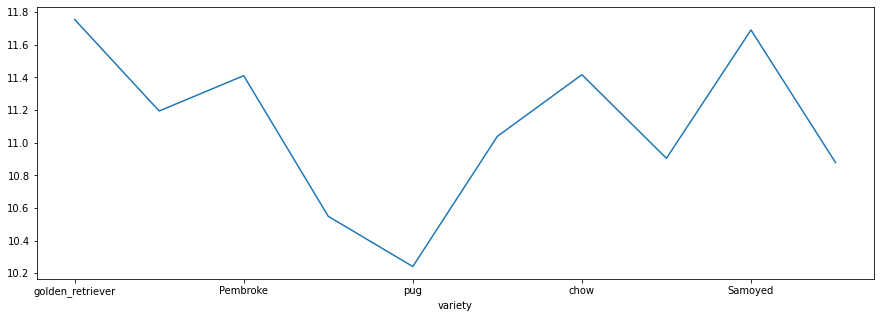

In [44]:
variety_rating_mean = variety_rating.groupby('variety')['rating'].mean()
variety_rating_sorted = variety_rating_mean.reindex(variety_sorted_ind)
variety_rating_sorted[:10].plot(figsize=(15,5))

In [51]:
db2 = db.copy()

one_stage = db2[db2.stage.str.find(',') >= 0].copy()
two_stage = one_stage.copy()
one_stage.stage, two_stage.stage = one_stage.stage.str.split(',').str
one_stage = one_stage.append(two_stage)


In [52]:

db2 = db2.append(one_stage,ignore_index=True)
ind = db2[db2.stage.str.find(',') >= 0].index
db2.drop(ind,axis=0,inplace=True)

In [53]:

stage_rating = db2[db2.stage.notnull()][['stage', 'rating_numerator']]
stage_rating.rename(columns={'rating_numerator':'rating'},inplace=True)
stage_rating.stage.value_counts()

pupper    229
doggo      76
puppo      28
floof      22
Name: stage, dtype: int64

In [54]:
ind = stage_rating['stage'].value_counts().index
total_stage = stage_rating['stage'].value_counts()[ind]
stage_rating_high = stage_rating[stage_rating.rating >= 10]
high_rating_stage = stage_rating_high['stage'].value_counts()[ind]
stage_highscore_rate = high_rating_stage / total_stage

In [64]:
print('Level quantity distribution:\n',total_stage)

Level quantity distribution:
 pupper    229
doggo      76
puppo      28
floof      22
Name: stage, dtype: int64


In [65]:
print('The rate of High scoring at all levels:\n',stage_highscore_rate)

The rate of High scoring at all levels:
 pupper    0.803493
doggo     0.934211
puppo     0.964286
floof     1.000000
Name: stage, dtype: float64


<AxesSubplot:title={'center':'rating'}, xlabel='stage'>

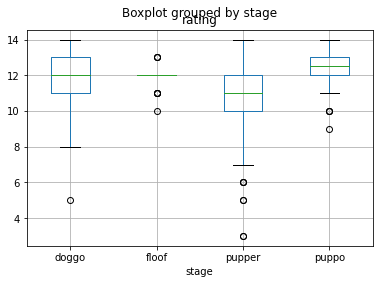

In [57]:
stage_rating.boxplot(column='rating',by='stage')

In [58]:
stage_favorite = db2[db2.stage.notnull()][['stage', 'favorite_count','retweet_count']]
stage_favorite.head()

,stage,favorite_count,retweet_count
9,doggo,32467.0,7711.0
12,puppo,38818.0,8538.0
14,puppo,15359.0,2321.0
24,floof,31061.0,6167.0
28,pupper,21524.0,3316.0


In [59]:
stage_favorite_mean = stage_favorite.groupby(['stage']).mean()
stage_favorite_mean = stage_favorite_mean.sort_values(by='favorite_count',ascending=False)
stage_favorite_mean

,favorite_count,retweet_count
stage,,
puppo,22758.928571,6777.142857
doggo,16917.381579,6002.578947
floof,10617.545455,3290.636364
pupper,7230.371179,2362.262009


<AxesSubplot:title={'center':'favorite_count'}, xlabel='stage'>

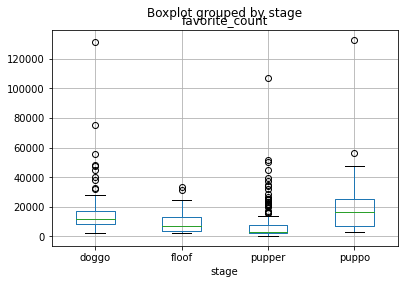

In [60]:
stage_favorite.boxplot(column='favorite_count',by='stage')

In [61]:
favorite_rating = db[['favorite_count', 'retweet_count', 'rating_numerator']]
favorite_rating = favorite_rating.rename(columns = {'rating_numerator':'rating'})
favorite_rating = favorite_rating.sort_values(by='rating', ascending=False)[10:]
favorite_rating.head(10)

,favorite_count,retweet_count,rating
165,25944.0,7855.0,14.0
275,10467.0,1544.0,14.0
681,18212.0,6148.0,14.0
162,21378.0,7570.0,14.0
324,3706.0,648.0,14.0
256,30380.0,7458.0,14.0
49,50199.0,16570.0,14.0
318,13075.0,5053.0,14.0
634,35400.0,17919.0,14.0
399,16236.0,4288.0,14.0


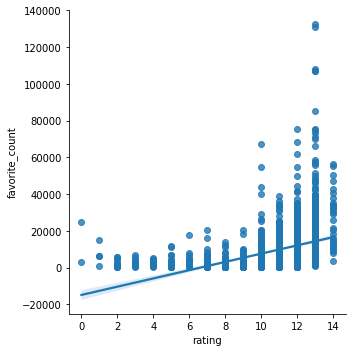

In [62]:
sns.lmplot('rating','favorite_count',data=favorite_rating)